<a href="https://colab.research.google.com/github/ssagar08/Breast_Cancer/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
source='/content/drive/MyDrive/SKillSlash/data.csv'
data = pd.read_csv(source)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data1=data

In [ ]:
data1['diagnosis']= data1['diagnosis'].apply(lambda x:1 if x == 'M' else 0 )

data1['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
x=data1.iloc[:,2:32].values
y=data1['diagnosis'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train[0].shape)

(455, 30)
(114, 30)
(455,)
(114,)
(30,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled[0]

array([-0.62555599,  0.39198905, -0.63076425, -0.6215682 ,  0.1183454 ,
       -0.42041382, -0.78471262, -0.68919554,  0.78672971,  0.03394912,
       -0.48992662, -0.03736384, -0.47838136, -0.48881879,  0.90895694,
        0.32270463, -0.55934464, -0.40617065,  0.24890082, -0.5989379 ,
       -0.66297303,  0.20577621, -0.6551452 , -0.63048966,  0.45153711,
       -0.2067122 , -0.7259553 , -0.47578669,  0.29763682, -0.55679628])

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,input_shape=x_train[0].shape,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [ ]:
losses=tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam',loss=[losses],metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=1000)

Epoch 1/1000
15/15 [==============================] - 2s 41ms/step - loss: 0.6991 - accuracy: 0.6418 - val_loss: 0.6949 - val_accuracy: 0.7018
Epoch 2/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.5594 - accuracy: 0.7802 - val_loss: 0.5659 - val_accuracy: 0.7544
Epoch 3/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4516 - accuracy: 0.8549 - val_loss: 0.4657 - val_accuracy: 0.8070
Epoch 4/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.3715 - accuracy: 0.8813 - val_loss: 0.3899 - val_accuracy: 0.8684
Epoch 5/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.3100 - accuracy: 0.9033 - val_loss: 0.3318 - val_accuracy: 0.8860
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.9209 - val_loss: 0.2869 - val_accuracy: 0.8947
Epoch 7/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.2311 - accuracy: 0.9319 - val_loss: 0.2539 - val_accuracy: 0.8947
Epo

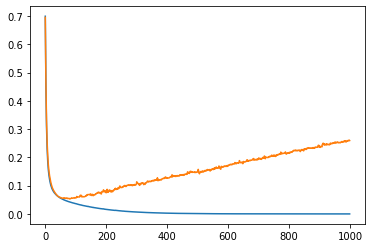

In [ ]:
pd.Series(history.history['loss']).plot()
pd.Series(history.history['val_loss']).plot()

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,input_shape=x_train_scaled[0].shape,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['Accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30),epochs=1000)

Epoch 1/1000
15/15 [==============================] - 2s 33ms/step - loss: 0.9245 - Accuracy: 0.4637 - val_loss: 0.7652 - val_Accuracy: 0.5526
Epoch 2/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.6924 - Accuracy: 0.6418 - val_loss: 0.6194 - val_Accuracy: 0.7544
Epoch 3/1000
15/15 [==============================] - 0s 13ms/step - loss: 0.5437 - Accuracy: 0.7758 - val_loss: 0.5115 - val_Accuracy: 0.7982
Epoch 4/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.4553 - Accuracy: 0.8264 - val_loss: 0.4350 - val_Accuracy: 0.8509
Epoch 5/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.3949 - Accuracy: 0.8703 - val_loss: 0.3745 - val_Accuracy: 0.8596
Epoch 6/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.3383 - Accuracy: 0.9011 - val_loss: 0.3286 - val_Accuracy: 0.8860
Epoch 7/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.3218 - Accuracy: 0.8901 - val_loss: 0.2903 - val_Accuracy: 0.8860

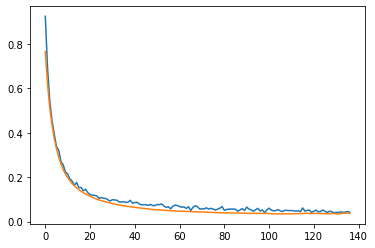

In [ ]:
pd.Series(history.history['loss']).plot()
pd.Series(history.history['val_loss']).plot()